In [13]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

import pandas as pd  ####  
import numpy as np #### 
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.stats.api as sms

El conjunto de datos “YearPredictionMSD” contiene información sobre canciones de música popular
y el año en que se grabaron. Incluye 515345 observaciones y 90 características, como la
intensidad media del sonido, la varianza del espectro de frecuencia y la correlación entre las
características espectrales. El objetivo es predecir el año en que se grabó la canción.

In [14]:
import zipfile
import requests

url = "Users/ASUS/Documents/Untitled Folder/YearPredictionMSD.txt.zip"
filename = "YearPredictionMSD.txt.zip"



In [15]:
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall()

Carque el conjunto de datos usando la función read_csv del paquete pandas
y el como primer argumento el link https://archive.ics.uci.edu/ml/
machine-learning-databases/00203/YearPredictionMSD.txt.zip, use como segundo
argumendo header = None.

In [16]:
df = pd.read_csv("YearPredictionMSD.txt", header=None)

In [17]:
df

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909


In [18]:
# Renombrar las columnas
new_columns = {0: 'year'}
new_columns.update({i: f'x{i}' for i in range(1, 91)})
df2 = df.rename(columns=new_columns)

In [19]:
df2

,year,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909


Dividir el conjunto de datos en características o variables explicativas X y variable objetivo
Y, tenga en cuenta que se quiere modelar el año en que se grabó la canción.

In [20]:
dfy = df2["year"] 
dfx = df2.drop(['year'], axis=1)

Reducir la dimensión de las variables. Usando un modelo de regresión LASSO con
un coeficiente de penalización de 10, para extraer características importantes del conjunto
de variables explicativas

In [21]:
La10 = Lasso(alpha=10)
La10.fit(dfx,dfy)

Lasso(alpha=10)

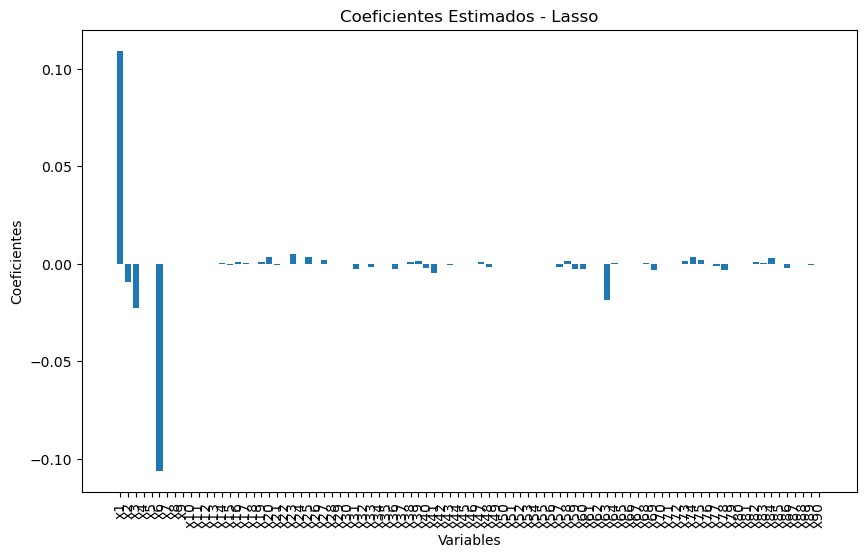

In [22]:
# Graficar los coeficientes estimados para Lasso
lasso_coefs = La10.coef_
# Obtener los nombres de las variables
feature_names = dfx.columns

# Graficar los coeficientes estimados para Lasso
plt.figure(figsize=(10, 6))
plt.bar(feature_names, lasso_coefs)
plt.xlabel('Variables')
plt.ylabel('Coeficientes')
plt.title('Coeficientes Estimados - Lasso')
plt.xticks(rotation=90)
plt.show()

In [23]:
lasso_coefs = La10.coef_
selected_features_lasso = dfx.columns[abs(lasso_coefs) > 0.02]
print("Variables seleccionadas - LASSO:", selected_features_lasso)

Variables seleccionadas - LASSO: Index(['x1', 'x3', 'x6'], dtype='object')


## OLS

Con el conjunto de variables reducido, ajuste un modelo de regresión OLS e interprete su
significancia y su R cuadrado ajustado.

In [24]:
import statsmodels.api as sm

X = sm.add_constant(dfx[['x1', 'x3', 'x6']])
model = sm.OLS(dfy, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   year   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                 1.977e+04
Date:                Sat, 27 May 2023   Prob (F-statistic):               0.00
Time:                        13:57:21   Log-Likelihood:            -1.9357e+06
No. Observations:              515345   AIC:                         3.871e+06
Df Residuals:                  515341   BIC:                         3.871e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1979.0457      0.108   1.83e+04      0.0

In [ ]:
Revise los supuestos de los errores, y con los hallazgos del ítem anterior, concluya sobre la
conveniencia de usar este modelo para predecir el año de grabación de la canción.

In [25]:
test = sms.het_breuschpagan(results.resid, results.model.exog)
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
for name, stat in zip(name, test):
    print(f'{name}: {stat}')

Lagrange multiplier statistic: 37885.77620734922
p-value: 0.0
f-value: 13630.548832619908
f p-value: 0.0


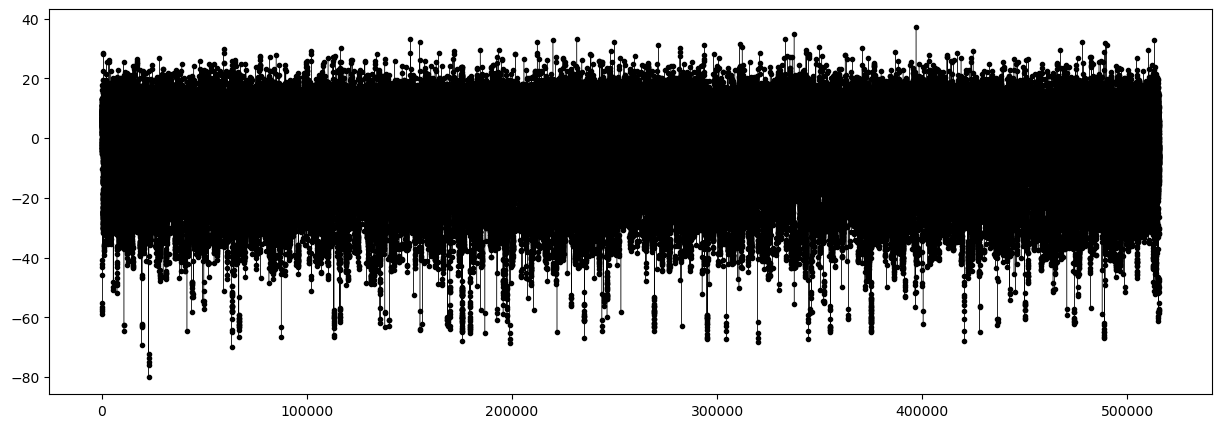

In [26]:
plt.figure(figsize = (15, 5))
plt.plot(results.resid, '.-', color = "black", linewidth = 0.3)

(array([9.00000e+00, 2.95000e+02, 4.47000e+02, 5.20300e+03, 2.31890e+04,
        4.45730e+04, 1.70665e+05, 2.59471e+05, 1.13540e+04, 1.39000e+02]),
 array([-79.88353531, -68.16529018, -56.44704506, -44.72879993,
        -33.01055481, -21.29230968,  -9.57406455,   2.14418057,
         13.8624257 ,  25.58067082,  37.29891595]),
 <BarContainer object of 10 artists>)

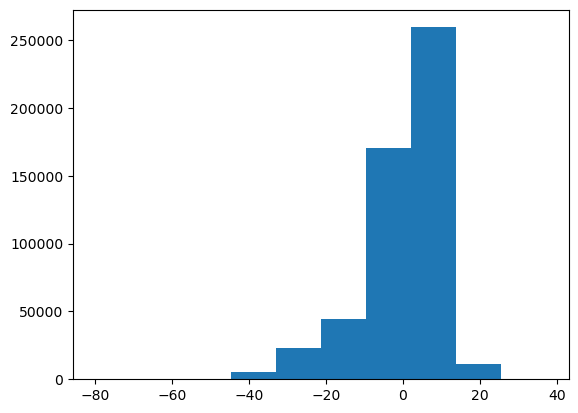

In [27]:
plt.hist(results.resid)

In [37]:
pip install --upgrade scipy

Note: you may need to restart the kernel to use updated packages.


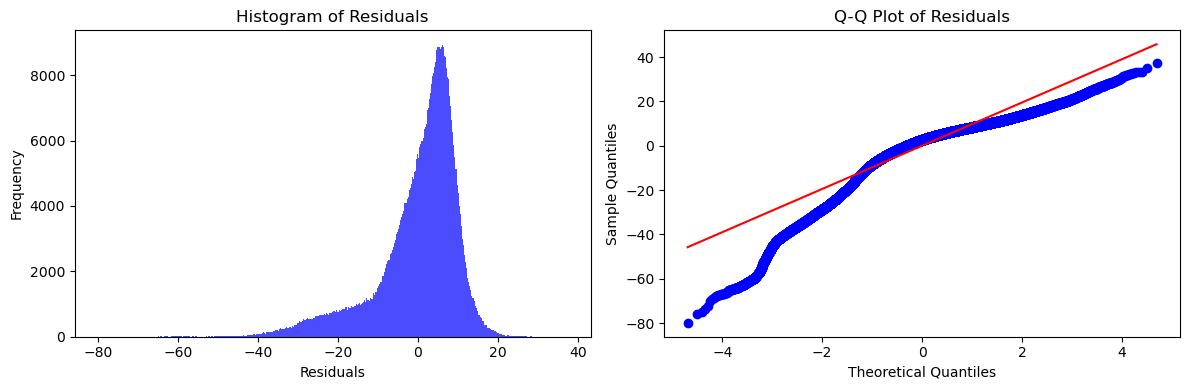

In [40]:
import scipy.stats as stats

# Visual Inspection
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(results.resid, bins='auto', color='blue', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')

plt.subplot(1, 2, 2)
stats.probplot(results.resid, plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

In [42]:
import scipy.stats as stats

# Jarque-Bera Test
jb_value, jb_p_value = stats.jarque_bera(results.resid)
print("Jarque-Bera Test:")
print("JB Value:", jb_value)
print("p-value:", jb_p_value)

# Kolmogorov-Smirnov Test
ks_statistic, ks_p_value = stats.kstest(results.resid, 'norm')
print("Kolmogorov-Smirnov Test:")
print("KS Statistic:", ks_statistic)
print("p-value:", ks_p_value)

Jarque-Bera Test:
JB Value: 347979.213929377
p-value: 0.0
Kolmogorov-Smirnov Test:
KS Statistic: 0.5100658441254022
p-value: 0.0


Con respecto a la conveniencia de usar este modelo para predecir el año de grabación de la canción, se deben considerar los resultados obtenidos en el resumen del modelo y la evaluación de los supuestos de los errores. En base a la información proporcionada, el modelo tiene un bajo R cuadrado ajustado (0.103), lo que indica que solo el 10.3% de la variabilidad en la variable de respuesta (año de grabación) se explica por las variables explicativas seleccionadas.

Además, es importante revisar los supuestos de los errores. Si se encuentra una violación significativa de los supuestos, como una falta de linealidad, heterocedasticidad o no normalidad de los errores, podría afectar la precisión y confiabilidad de las predicciones del modelo.

En conclusión, con base en los resultados y la evaluación de los supuestos de los errores, podría haber limitaciones en la utilización de este modelo para predecir el año de grabación de una canción. Sería recomendable realizar un análisis más exhaustivo de los supuestos y explorar otras técnicas de modelado antes de tomar decisiones finales sobre su conveniencia para la predicción.